In [10]:
from qiskit import (QuantumCircuit, execute, IBMQ)
from qiskit.visualization import plot_histogram
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
shots = 256

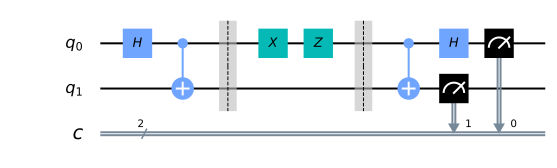

In [11]:
circ = QuantumCircuit(2, 2)
circ.h(0)
circ.cx(0,1)
circ.barrier()
#circ.iden(0) # for  00
#circ.x(0) # for 01
#circ.z(0) # for 10
circ.x(0) # for 11
circ.z(0) # for 11
circ.barrier()
circ.cx(0,1)
circ.h(0)
circ.measure([0, 1], [0, 1])
circ.draw(output='mpl')

least busy backend:  ibmq_london
Job Status: job has successfully run


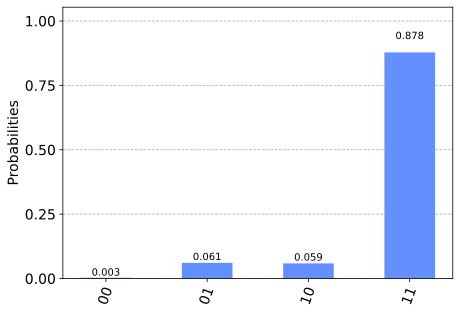

In [14]:

#IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: not x.configuration().simulator and x.configuration().n_qubits >= 2 and x.status().operational==True))
print("least busy backend: ", backend)
job = execute(circ, backend=backend, shots=1024)
job_monitor(job)
plot_histogram(job.result().get_counts(circ))